# Market Segmentation Analysis | McDonalds Case Study
### Author: Saksham Singh (screenygeek)
### Email: screenygeek@gmail.com

# Import Statements

In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from collections import Counter

### Dataset Import (McDonalds - Fast Food)

In [121]:
data = pd.read_csv("mcdonalds.csv")

In [122]:
data.head(5)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


# Data Description

In [123]:
# The data collection includes responses from 1453 adult Australian consumers about how they see the following aspects of McDonald's: 
# YUMMY,
# CONVENIENT,
# SPICY,
# FATTENING,
# GREASY,
# FAST,
# CHEAP,
# TASTY,
# EXPENSIVE,
# HEALTHY,
# DISGUSTING.

# Data Checking

In [124]:
data.shape

(1453, 15)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [126]:
data.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [127]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [128]:
# Checking the count of 'Gender', 'VisitFrequency' and 'Like'
data['Gender'].value_counts()
data['VisitFrequency'].value_counts()
data['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

Dataset is verified and checked successfully!

# Exploratory Data Analysis (EDA)

### Customer Segmentation on the basis of **Gender**

In [129]:
data['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

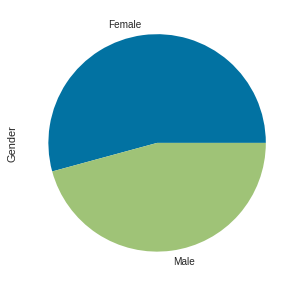

In [130]:
plot = data['Gender'].value_counts().plot(kind='pie', figsize=(5, 5))

 Conclusion: There are more female customers than male.

### Customer Segmentation on the basis of **Age**

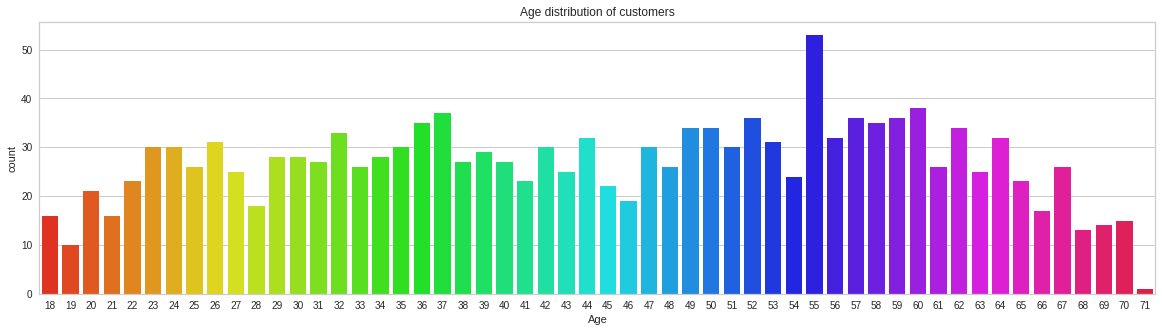

In [131]:
plt.rcParams['figure.figsize'] = (20, 5)
f = sns.countplot(x=data['Age'],palette = 'hsv')
plt.title('Age distribution of customers')
plt.show()

Conclusion: McDonalds have more customers of age between 50-60 and 32-37

# Data Preprocessing

### Label Encoding | Categorical Variable

'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting'

In [132]:
data_mod = data.copy()

In [133]:
cat_features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

In [134]:
for i in cat_features:
  print(i)
  print("Unique Values:", data_mod[i].unique())
  print()

yummy
Unique Values: ['No' 'Yes']

convenient
Unique Values: ['Yes' 'No']

spicy
Unique Values: ['No' 'Yes']

fattening
Unique Values: ['Yes' 'No']

greasy
Unique Values: ['No' 'Yes']

fast
Unique Values: ['Yes' 'No']

cheap
Unique Values: ['Yes' 'No']

tasty
Unique Values: ['No' 'Yes']

expensive
Unique Values: ['Yes' 'No']

healthy
Unique Values: ['No' 'Yes']

disgusting
Unique Values: ['No' 'Yes']



In [135]:
for i in cat_features:
  data_mod[i] = LabelEncoder().fit_transform(data_mod[i])

Replacing 'i love it!+5' and 'i hate it!-5' part from the "Like" and encoding it in numerical format ("+2" => 2)

In [136]:
data_mod['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [137]:
data_mod['Like']

0                 -3
1                 +2
2                 +1
3                 +4
4                 +2
            ...     
1448    I hate it!-5
1449              +2
1450              +3
1451              +4
1452              -3
Name: Like, Length: 1453, dtype: object

In [138]:
data_mod['Like'].replace(["I love it!+5"],"5",inplace=True)
data_mod['Like'].replace(["I hate it!-5"],"-5",inplace=True)

In [139]:
data_mod['Like'] = data_mod['Like'].astype(int)

In [140]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   int64 
 1   convenient      1453 non-null   int64 
 2   spicy           1453 non-null   int64 
 3   fattening       1453 non-null   int64 
 4   greasy          1453 non-null   int64 
 5   fast            1453 non-null   int64 
 6   cheap           1453 non-null   int64 
 7   tasty           1453 non-null   int64 
 8   expensive       1453 non-null   int64 
 9   healthy         1453 non-null   int64 
 10  disgusting      1453 non-null   int64 
 11  Like            1453 non-null   int64 
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(13), object(2)
memory usage: 170.4+ KB


# Data Visualization

### Histogram plot of Binary Variables & ("Like", "Age")

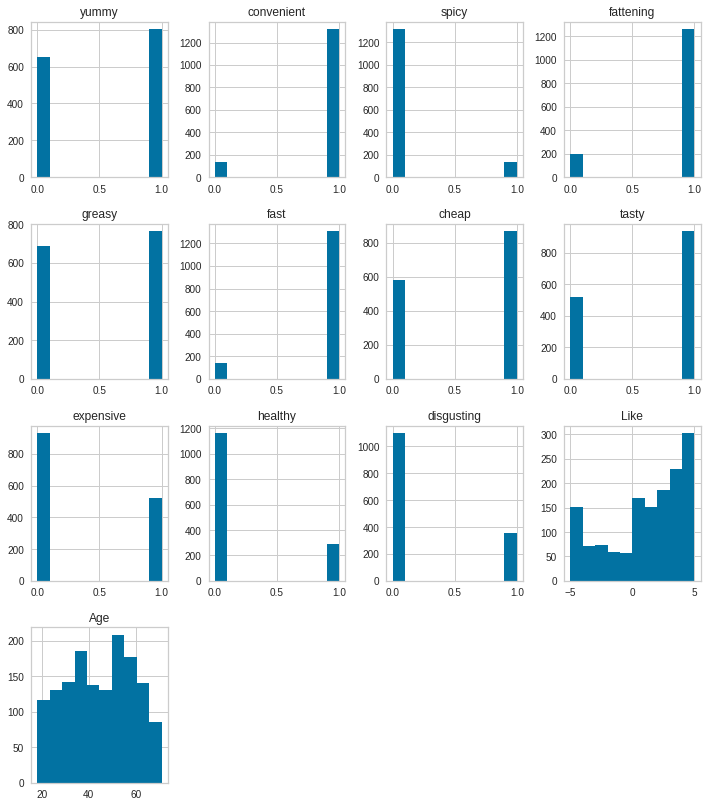

In [141]:
plt.rcParams['figure.figsize'] = (12,14)
data_mod.hist()
plt.show()

### Distribution of "Like"

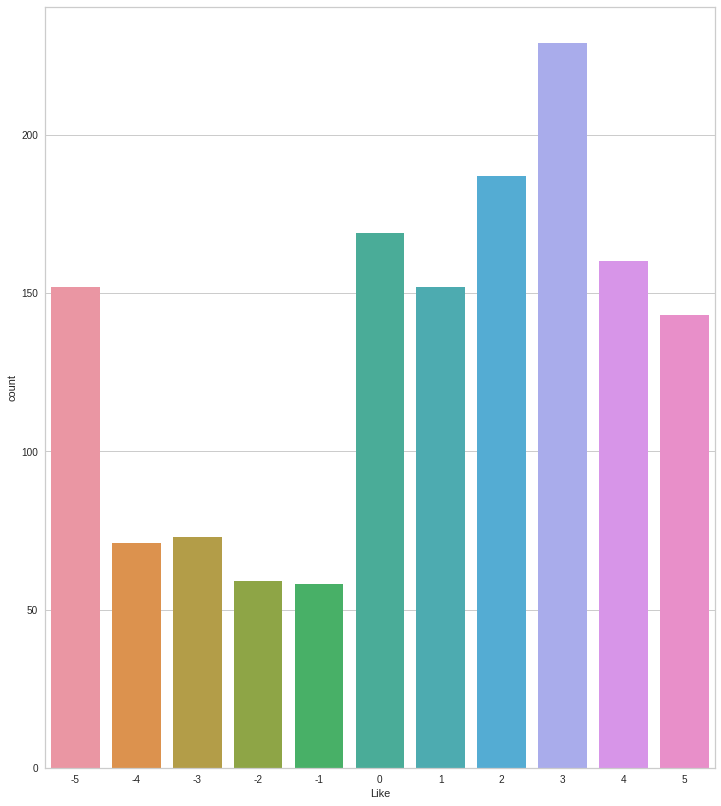

In [142]:
sns.countplot(x='Like',data=data_mod)

Conclusion: Most of the customers have given a rating of 3 (Average Rating)

# Principal Componenent Analysis (PCA)

Taking the first 11 features from the dataset and applying PCA over them \
Number of Principal Components Taken: 5

In [143]:
data_mod_forPCA = data_mod.loc[:,cat_features]

In [144]:
pca = PCA(n_components=5)
pc = pca.fit_transform(data_mod_forPCA)
names = ['pc1','pc2','pc3','pc4','pc5']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5
0,0.425367,-0.219079,0.663255,-0.401300,0.201705
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669
2,0.375415,0.730435,-0.122040,0.692262,0.839643
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415
4,0.187057,-0.807610,0.028537,0.548332,0.854074
...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645


Proportion of Variance from First to Fifth PC

In [145]:
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052])

Text(0.5, 1.0, 'Scree Plot')

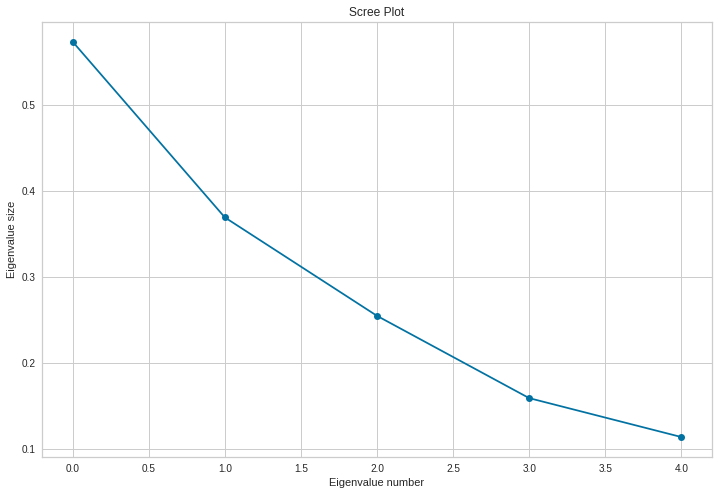

In [146]:
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

# Extracting Segments

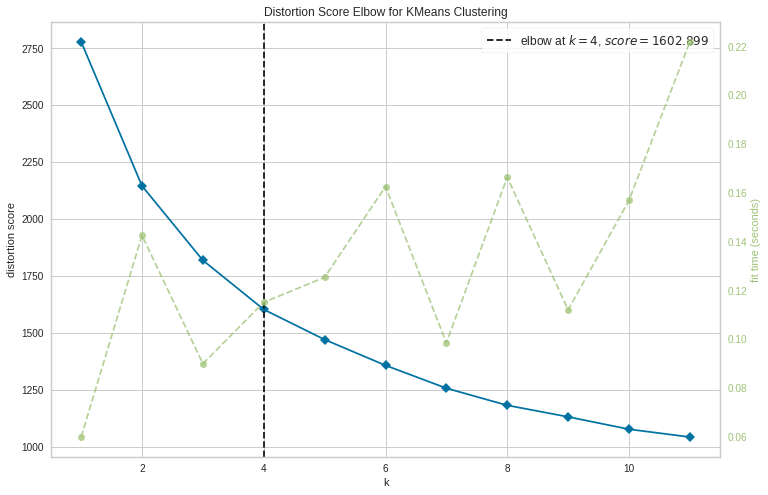

In [147]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_mod_forPCA)
visualizer.show()

Conclusion: Best Number of Clusters = 4

# Using K-Means Clustering (Number of Clusters = 4)

### Running K-Means

In [148]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(pf)
data_mod_forPCA['cluster_num'] = kmeans.labels_ 

### Information

In [149]:
print("K-Means Labels:")
print(kmeans.labels_,end="\n\n")
print("Within Cluster SS:")
print(kmeans.inertia_,end="\n\n")
print("Number of Iterations Taken:")
print(kmeans.n_iter_,end="\n\n")

K-Means Labels:
[1 0 0 ... 0 3 2]

Within Cluster SS:
960.1782311301856

Number of Iterations Taken:
7



### Cluster Sizes

In [150]:
Counter(kmeans.labels_)

Counter({0: 354, 1: 308, 2: 241, 3: 550})

### Visualizing Clusters

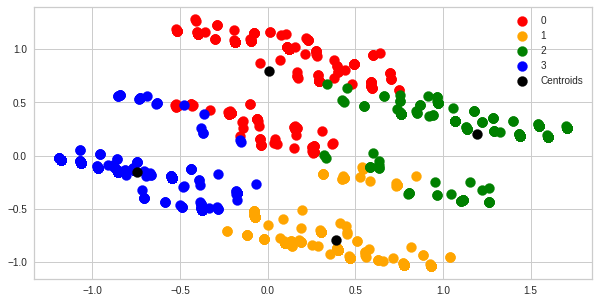

In [151]:
plt.figure(figsize=(10,5))
plt.scatter(pf.values[y_kmeans  == 0, 0], pf.values[y_kmeans  == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(pf.values[y_kmeans  == 1, 0], pf.values[y_kmeans  == 1, 1], s = 100, c = 'orange', label = '1')
plt.scatter(pf.values[y_kmeans  == 2, 0], pf.values[y_kmeans  == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(pf.values[y_kmeans  == 3, 0], pf.values[y_kmeans  == 3, 1], s = 100, c = 'blue', label = '3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()